In [2]:
import pandas as pd

# Load Sierra Leone data
df_sl = pd.read_csv('../data/sierraleone-bumbuna.csv')


print(df_sl.info())
print(df_sl.head())

print(df_sl.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [3]:
df_sl['Timestamp'] = pd.to_datetime(df_sl['Timestamp'])
df_sl.set_index('Timestamp', inplace=True)


cols_to_drop = ['Comments']  
df_sl_clean = df_sl.drop(columns=cols_to_drop)


df_sl_clean = df_sl_clean.dropna()

df_sl_clean.to_csv('../data/sierraleone_clean.csv', index=True)

print("Cleaned Sierra Leone data saved to '../data/sierraleone_clean.csv'")

Cleaned Sierra Leone data saved to '../data/sierraleone_clean.csv'


<Figure size 1200x600 with 0 Axes>

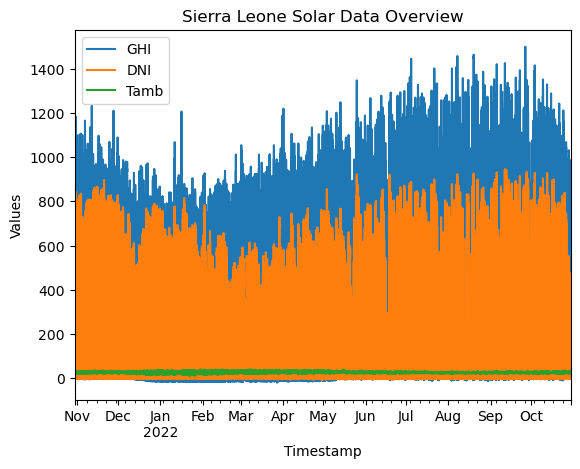

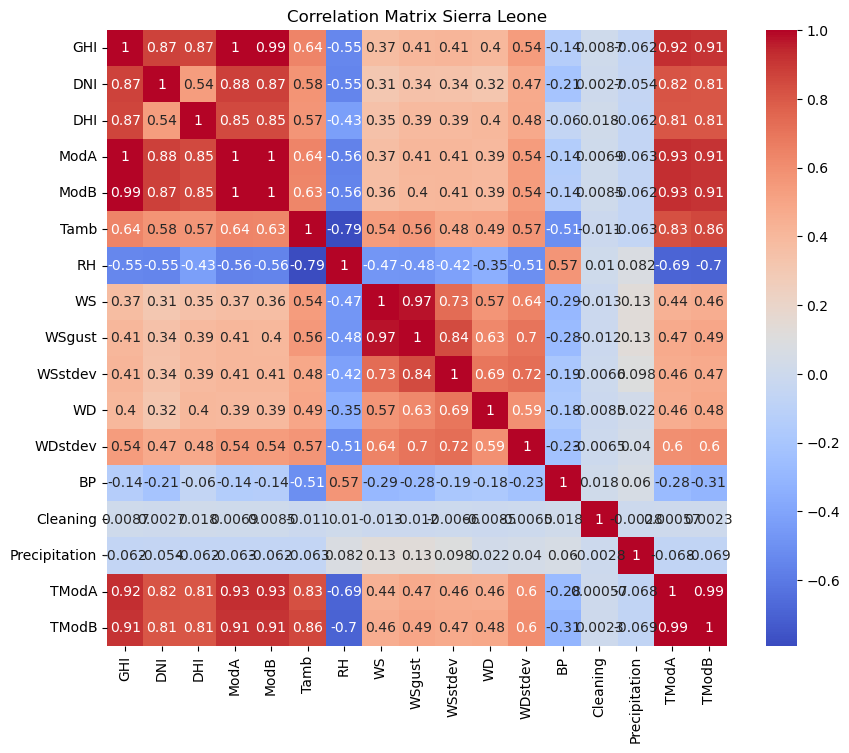

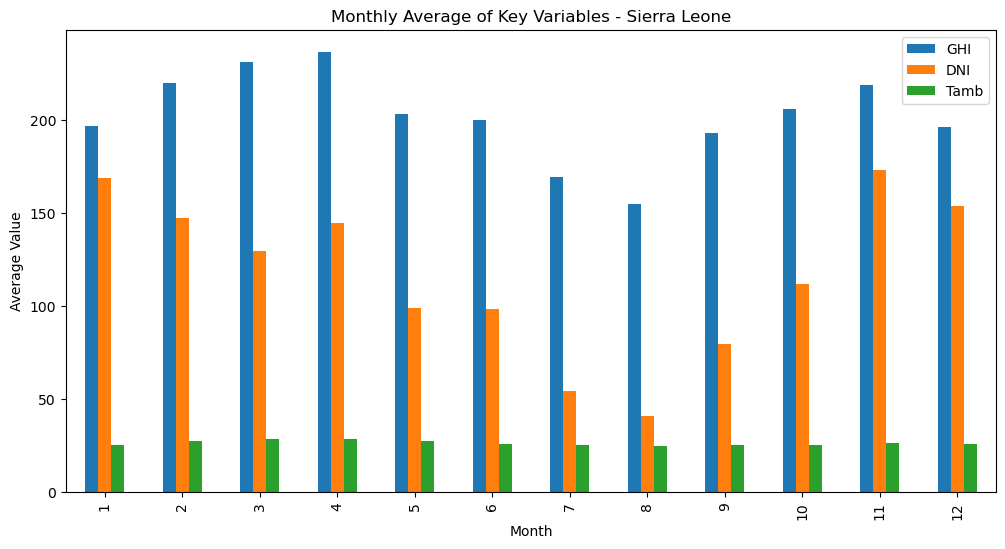

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df_sl_clean = pd.read_csv('../data/sierraleone_clean.csv', index_col='Timestamp', parse_dates=True)

# Plot time series of GHI, DNI, and Tamb over time (or whichever columns are available)
plt.figure(figsize=(12, 6))
df_sl_clean[['GHI', 'DNI', 'Tamb']].plot()
plt.title('Sierra Leone Solar Data Overview')
plt.ylabel('Values')
plt.show()

# Correlation heatmap (only numerical columns)
plt.figure(figsize=(10, 8))
sns.heatmap(df_sl_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Sierra Leone')
plt.show()

# Monthly averages for GHI, DNI, Tamb
df_sl_clean['Month'] = df_sl_clean.index.month
monthly_avg = df_sl_clean.groupby('Month')[['GHI', 'DNI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average of Key Variables - Sierra Leone')
plt.ylabel('Average Value')
plt.show()
